In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import seaborn as sns

In [2]:
import os

from google.colab import drive
import os
import pandas as pd

# Mount the Google Shared Drive
drive.mount('/content/gdrive')

# Get the path to the folder containing the CSV files
folder_path = '/content/gdrive/Shared drives/DSO545 Group Project/dunnhumby_project_data'

# Loop through all files in the folder
for filename in os.listdir(folder_path):
  # Check if the file is a CSV file
  if filename.endswith('.csv'):
    # Get the full path of the file
    file_path = os.path.join(folder_path, filename)
    # Read the CSV file into a Pandas DataFrame
    df = pd.read_csv(file_path)
    # Remove the extension from the filename
    df_name = 'df_'+filename.split('.')[0]
    #Store the DataFrame with the df_name as its name
    locals()[df_name] = df
    print(df_name)
# # Print the names of the DataFrames
# print(f"List of DataFrames created: {', '.join(locals().keys())}")


Mounted at /content/gdrive
df_campaign_desc
df_campaign_table
df_causal_data
df_coupon_redempt
df_transaction_data
df_coupon
df_product
df_hh_demographic


# Table Description

**4 descriptions:**
1) Table metadata
2) Feature Classification
3) Data Skewness
4) Table descriptives KPIs

## Table metadata

In [3]:
df_hh_demographic["MARITAL_STATUS_CODE"].replace(['A', 'B', 'U'],['Married','Unknown','Single'],inplace=True)
df_hh_demographic.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,Married,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,Single,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,Single,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,Unknown,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [4]:
# Create a table dictionary
tables = {'campaign_table' : df_campaign_table, 'causal_data' : df_causal_data, 'coupon': df_coupon, 'coupon_redempt' : df_coupon_redempt, 'hh_demographic' : df_hh_demographic, 'product': df_product, 'transaction_data' : df_transaction_data}
tables

{'campaign_table':      DESCRIPTION  household_key  CAMPAIGN
 0          TypeA             17        26
 1          TypeA             27        26
 2          TypeA            212        26
 3          TypeA            208        26
 4          TypeA            192        26
 ...          ...            ...       ...
 7203       TypeC           1803        15
 7204       TypeC           1082        15
 7205       TypeC            942        15
 7206       TypeC            855        15
 7207       TypeC            334        15
 
 [7208 rows x 3 columns],
 'causal_data':           PRODUCT_ID  STORE_ID  WEEK_NO display mailer
 0              26190       286       70       0      A
 1              26190       288       70       0      A
 2              26190       289       70       0      A
 3              26190       292       70       0      A
 4              26190       293       70       0      A
 ...              ...       ...      ...     ...    ...
 36786519    18203921       439

In [5]:
#To check if any feautre in a table has missing value:
features_with_nan = {}
print("Features in dataset with missing values:")
for table in tables:
    features_with_nan[table] = [feature for feature in tables[table].columns if tables[table][feature].isna().sum()>0]
features_with_nan

Features in dataset with missing values:


{'campaign_table': [],
 'causal_data': [],
 'coupon': [],
 'coupon_redempt': [],
 'hh_demographic': [],
 'product': [],
 'transaction_data': []}

In [6]:
#Metadata description for all the tables
for table in tables:
    pd.isnull(tables[table]).sum()
    tables[table].info()
    tables[table] = tables[table].dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36786524 entries, 0 to 36786523
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   PRODUCT_ID  int64 
 1   STORE_ID    int64 
 2   WEEK_NO     int64 
 3   display     object
 4   mailer      object
dtypes: int64(3), object(2)
memory usage: 1.4+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 n

## Feature classification

### **Numerical Features**

In [7]:
# List of all numererical features
print("List of all numererical features:")
feature_numerical = {}
for table in tables:
    feature_numerical[table] = [feature for feature in tables[table].columns if tables[table][feature].dtype!='O']
feature_numerical


List of all numererical features:


{'campaign_table': ['household_key', 'CAMPAIGN'],
 'causal_data': ['PRODUCT_ID', 'STORE_ID', 'WEEK_NO'],
 'coupon': ['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'],
 'coupon_redempt': ['household_key', 'DAY', 'COUPON_UPC', 'CAMPAIGN'],
 'hh_demographic': ['household_key'],
 'product': ['PRODUCT_ID', 'MANUFACTURER'],
 'transaction_data': ['household_key',
  'BASKET_ID',
  'DAY',
  'PRODUCT_ID',
  'QUANTITY',
  'SALES_VALUE',
  'STORE_ID',
  'RETAIL_DISC',
  'TRANS_TIME',
  'WEEK_NO',
  'COUPON_DISC',
  'COUPON_MATCH_DISC']}

In [8]:
# List of all discrete numererical features at nunique at 50
print("List of all discrete numererical features:")
feature_discrete_numerical = {}
for table in tables:
    feature_discrete_numerical[table] = [feature for feature in tables[table].columns if tables[table][feature].nunique()<50 and tables[table][feature].dtype!='O']
feature_discrete_numerical

List of all discrete numererical features:


{'campaign_table': ['CAMPAIGN'],
 'causal_data': [],
 'coupon': ['CAMPAIGN'],
 'coupon_redempt': ['CAMPAIGN'],
 'hh_demographic': [],
 'product': [],
 'transaction_data': []}

In [9]:
# List of all Continuous numererical features
print("List of all continuous numererical features:")
features_continuous_numerical = {}
for table in tables:
    features_continuous_numerical[table]=[features for features in tables[table] if features not in feature_discrete_numerical[table] and tables[table][features].dtype!='O']
features_continuous_numerical

List of all continuous numererical features:


{'campaign_table': ['household_key'],
 'causal_data': ['PRODUCT_ID', 'STORE_ID', 'WEEK_NO'],
 'coupon': ['COUPON_UPC', 'PRODUCT_ID'],
 'coupon_redempt': ['household_key', 'DAY', 'COUPON_UPC'],
 'hh_demographic': ['household_key'],
 'product': ['PRODUCT_ID', 'MANUFACTURER'],
 'transaction_data': ['household_key',
  'BASKET_ID',
  'DAY',
  'PRODUCT_ID',
  'QUANTITY',
  'SALES_VALUE',
  'STORE_ID',
  'RETAIL_DISC',
  'TRANS_TIME',
  'WEEK_NO',
  'COUPON_DISC',
  'COUPON_MATCH_DISC']}

## **Skewness**

In [10]:
from scipy.stats import skew
import matplotlib.pyplot as plt


-------campaign_table-------
household_key skewness is : -0.017930126812310605


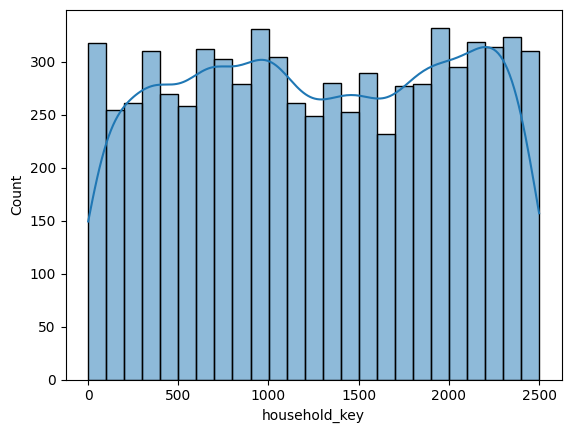


-------causal_data-------
PRODUCT_ID skewness is : 1.4141271349570859


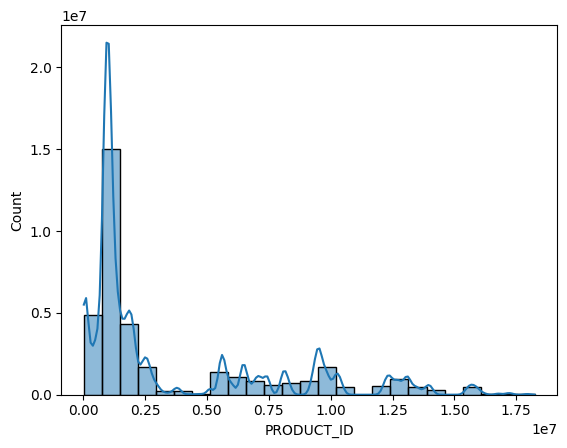

STORE_ID skewness is : 2.863027360219804


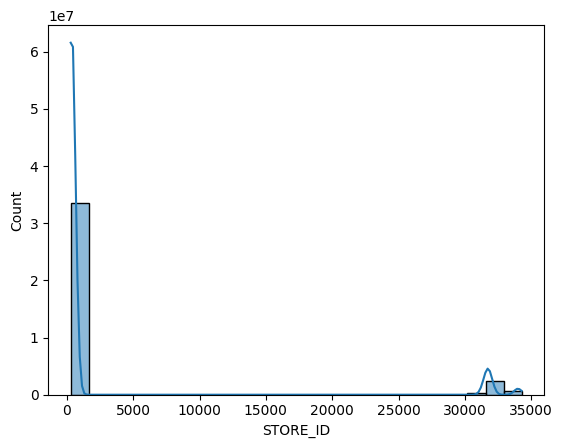

WEEK_NO skewness is : -0.026594181825637418


In [ ]:
for keys,vals in features_continuous_numerical.items():
    print("\n-------"+keys+"-------")
    for val in vals:
        print(val, 'skewness is :', skew(tables[keys][val]))
        sns.histplot(x=val, data=tables[keys], bins=25, kde=True)
        plt.show()

## Table descriptives

In [ ]:
for keys,values in tables.items():
    print("\n \n----------"+keys+"----------")
    print(values.describe().transpose())

# Summarize datasets on Household key level

**Create a final dataset by summarzing and merging all 7 datasets**
**We will have following merges:**
1) Transaction Product Merge: Transcation and Product merge and summarized on household key level -> This will gives us transcation and product detail of a household
2) Coupon Redm Merge: Coupon and Campaign merge and summarized on household key level -> This will provide us the coupon redemption fileds
3) Campaign Received: Summarize Campaign table on household key level
4) Household demographic

## **Transaction Product Merge**

In [ ]:
#Merge Transcation data with product data
trans_product = pd.merge(df_transaction_data, df_product, on='PRODUCT_ID', how='left')
trans_product
trans_product_copy = trans_product.copy()

In [ ]:
#Find all possible values in that field
department_list = trans_product_copy['DEPARTMENT'].unique().tolist()
brand_list = trans_product_copy['BRAND'].unique().tolist()

print("\n Department list:")
print(department_list)
print("\n Brand list:")
print(brand_list)

In [ ]:
#Create a new field called National brand which is 1 when brand is national and 0 when private
trans_product_copy ['National_brand'] = trans_product ['BRAND'].apply(lambda x: 1 if x == "National" else 0)

In [ ]:
trans_product_copy

In [ ]:
#Summarize trans-product data on household key level
trans_product_copy2 = trans_product_copy.groupby('household_key').agg(total_basket=('BASKET_ID', 'nunique'),total_days_store_visited=('DAY', 'nunique'),
                                                                    total_trans=('household_key', 'count'),
                                                                     total_dist_prod_bought=('PRODUCT_ID', 'nunique'),
                                                                     total_prod_bought=('PRODUCT_ID', 'count'),
                                                                     total_quantity=('QUANTITY', 'sum'),
                                                                     total_sales=('SALES_VALUE', 'sum'),
                                                                     total_dist_store_visited=('STORE_ID', 'nunique'),
                                                                     total_retail_disc=('RETAIL_DISC', 'sum'),
                                                                     total_coupon_disc=('COUPON_DISC', 'sum'),
                                                                     total_coupon_match_disc=('COUPON_MATCH_DISC', 'sum'),
                                                                     total_distinct_product_manufacturer=('MANUFACTURER', 'nunique'),
                                                                     total_distinct_department=('DEPARTMENT', 'nunique'),
                                                                     total_distinct_commodities=('COMMODITY_DESC', 'nunique'),
                                                                     National_brand_visit=('National_brand', 'sum')).reset_index()

In [ ]:
#Create a National Brand visited flag. 1 if ever visited; 0 if never
trans_product_copy2['National_brand_visited_flag'] = trans_product_copy2['National_brand_visit'].apply(lambda x: 1 if x >=1 else 0)

In [ ]:
#Drop the old field National_brand_visti
trans_product_copy2 = trans_product_copy2.drop('National_brand_visit', axis=1)

In [ ]:
trans_product_copy2

## **Coupon Redm Merge**


In [ ]:
df_coupon_redempt_copy=df_coupon_redempt.copy()
df_campaign_table_copy=df_campaign_table.copy()

In [ ]:
#Merge Coupon Redm and Campaign table to get more detailed coupon redm table
coupon_redm = pd.merge(df_coupon_redempt_copy, df_campaign_table, on=['household_key', 'CAMPAIGN'], how='left')


In [ ]:
coupon_redm

In [ ]:
#Create coupon type redm field from description field
coupon_redm['total_typeA_coupon_redm'] = coupon_redm['DESCRIPTION'].apply(lambda x: 1 if x == "TypeA" else 0)
coupon_redm['total_typeB_coupon_redm'] = coupon_redm['DESCRIPTION'].apply(lambda x: 1 if x == "TypeB" else 0)
coupon_redm['total_typeC_coupon_redm'] = coupon_redm['DESCRIPTION'].apply(lambda x: 1 if x == "TypeC" else 0)

In [ ]:
coupon_redm

In [ ]:
#Summarize it on household key level
coupon_redm2 = coupon_redm.groupby('household_key').agg(total_coupon_redm=('COUPON_UPC', 'count'),total_dist_campaign_type_redm=('DESCRIPTION', 'nunique'),
                                                                    total_typeA_coupon_redm=('total_typeA_coupon_redm', 'sum'),
                                                                      total_typeB_coupon_redm=('total_typeB_coupon_redm', 'sum'),
                                                                      total_typeC_coupon_redm=('total_typeC_coupon_redm', 'sum'),
                                                                     total_dist_campaign_redm=('CAMPAIGN', 'nunique')).reset_index()

In [ ]:
coupon_redm2

## **Campaign Received**

In [ ]:
##Create coupon type rec field from description field
df_campaign_table_copy['total_typeA_coupon_rec'] = df_campaign_table_copy['DESCRIPTION'].apply(lambda x: 1 if x == "TypeA" else 0)
df_campaign_table_copy['total_typeB_coupon_rec'] = df_campaign_table_copy['DESCRIPTION'].apply(lambda x: 1 if x == "TypeB" else 0)
df_campaign_table_copy['total_typeC_coupon_rec'] = df_campaign_table_copy['DESCRIPTION'].apply(lambda x: 1 if x == "TypeC" else 0)

In [ ]:
df_campaign_table_copy

In [ ]:
#Summarize it on household key level
campaign_rec = df_campaign_table_copy.groupby('household_key').agg(total_campaign_rec=('CAMPAIGN', 'count'),total_dist_campaign_type_rec=('DESCRIPTION', 'nunique'),
                                                                    total_typeA_coupon_rec=('total_typeA_coupon_rec', 'sum'),
                                                                      total_typeB_coupon_rec=('total_typeB_coupon_rec', 'sum'),
                                                                      total_typeC_coupon_rec=('total_typeC_coupon_rec', 'sum'),
                                                                     total_dist_campaign_rec=('CAMPAIGN', 'nunique')).reset_index()

In [ ]:
campaign_rec

## **Household Demographics**

In [ ]:
df_hh_demographic

In [ ]:
#Create a copy of demographic dataset
df_hh_demographic_copy = df_hh_demographic.copy()
#Drop HH_COMP_DESC it is a replicated field
df_hh_demographic_copy = df_hh_demographic_copy.drop('HH_COMP_DESC', axis=1)

### Label ordinal encoding

In [ ]:
category_mapping = {'Under 15K': 1, '15-24K': 2, '25-34K': 3, '35-49K': 4, '50-74K': 5, '75-99K': 6, '100-124K': 7, '125-149K': 8, '150-174K': 9, '175-199K': 10, '200-249K': 11, '250K+': 12}
df_hh_demographic_copy['income_desc_encoded'] = df_hh_demographic_copy['INCOME_DESC'].map(category_mapping)

In [ ]:
df_hh_demographic_copy = df_hh_demographic_copy.drop('INCOME_DESC', axis=1)

In [ ]:
category_mapping = {'None/Unknown': 0,'1': 1,'2': 2,'3+': 3}
df_hh_demographic_copy['KID_CATEGORY_DESC_encoded'] = df_hh_demographic_copy['KID_CATEGORY_DESC'].map(category_mapping)

In [ ]:
df_hh_demographic_copy = df_hh_demographic_copy.drop('KID_CATEGORY_DESC', axis=1)

In [ ]:
category_mapping = {'1': 1,'2': 2,'3': 3,'4': 4,'5+': 5}
df_hh_demographic_copy['HOUSEHOLD_SIZE_DESC_encoded'] = df_hh_demographic_copy['HOUSEHOLD_SIZE_DESC'].map(category_mapping)

In [ ]:
df_hh_demographic_copy = df_hh_demographic_copy.drop('HOUSEHOLD_SIZE_DESC', axis=1)

### One hot encoding (Non ordinal categorical variables)

In [ ]:
#One hot encoding
df_hh_demographic_copy2 = pd.get_dummies(df_hh_demographic_copy, columns=['AGE_DESC'], prefix=['AGE_DESC'])
df_hh_demographic_copy2 = pd.get_dummies(df_hh_demographic_copy2, columns=['MARITAL_STATUS_CODE'], prefix=['MARITAL_STATUS_CODE'])
df_hh_demographic_copy2 = pd.get_dummies(df_hh_demographic_copy2, columns=['HOMEOWNER_DESC'], prefix=['HOMEOWNER_DESC'])

In [ ]:
df_hh_demographic_copy2

# **Data Merge**

**Merges all the summarized tables into one final table**

In [ ]:
#Merge summarized Demographic table and the summarzied campaign_rec table
demographic_coupon = pd.merge(df_hh_demographic_copy2, campaign_rec, on= 'household_key', how='left')


In [ ]:
demographic_coupon

In [ ]:
## Replacing the nan values after the merge

In [ ]:
demographic_coupon['total_dist_campaign_type_rec'] = demographic_coupon['total_dist_campaign_type_rec'].apply(lambda x: x if pd.notnull(x) else 0)

In [ ]:
demographic_coupon['campaign_received_flag'] = demographic_coupon['total_dist_campaign_type_rec'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
fields_to_replace_nan = ['total_campaign_rec', 'total_typeA_coupon_rec', 'total_typeB_coupon_rec','total_typeC_coupon_rec','total_dist_campaign_rec']

# Replace NaN with 0 for the specified fields
demographic_coupon[fields_to_replace_nan] = demographic_coupon[fields_to_replace_nan].fillna(0)

**Merge Demographic coupon with coupon redemption**

In [ ]:
demographic_coupon_campaign = pd.merge(demographic_coupon, coupon_redm2, on= 'household_key', how='left')


In [ ]:
demographic_coupon_campaign

In [ ]:
#Replace all nan values in field accordingly
demographic_coupon_campaign['coupon_redm_flag'] = demographic_coupon_campaign['total_coupon_redm'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [ ]:
fields_to_replace_nan = ['total_coupon_redm', 'total_dist_campaign_type_redm', 'total_typeA_coupon_redm','total_typeB_coupon_redm','total_typeC_coupon_redm','total_dist_campaign_redm']
# Replace NaN with 0 for the specified fields
demographic_coupon_campaign[fields_to_replace_nan] = demographic_coupon_campaign[fields_to_replace_nan].fillna(0)

In [ ]:
demographic_coupon_campaign

**Merge trans_product with houshold_coupon_campaign**

In [ ]:
trans_product_copy2

In [ ]:
demographic_coupon_campaign

In [ ]:
df_final = pd.merge(demographic_coupon_campaign, trans_product_copy2, on= 'household_key', how='left')


In [ ]:
df_final.columns

In [ ]:
#Export final dataset as excel
# Specify the file path and name for the Excel file
excel_file_path = 'D:/MSBA/Project/final_dataframe.xlsx'

# Export the final DataFrame to Excel
df_final.to_excel(excel_file_path, index=False)


# Feature Defintion

**The explorations are:**
1) Feature Classification
2) Skewness / Normality
3) Table descriptives
4) Scatter plot / Line of best fit

## Feature classification

In [ ]:
#Numerical features
feature_numerical=[feature for feature in df_final.columns if df_final[feature].dtype!='O']
print('Number of numerical columns=', len(feature_numerical))
print(df_final[feature_numerical].head())

In [ ]:
print("The Numerical features are:")
df_final.columns.tolist()

In [ ]:
abc = ['total_typeA_coupon_rec',
 'total_typeB_coupon_rec',
 'total_typeC_coupon_rec',
 'total_typeC_coupon_redm',
]

In [ ]:
#Discrete Numerical features
print("The Discrete Numerical features are:")
feature_discrete_numerical=[feature for feature in feature_numerical if df_final[feature].nunique()<15]
feature_discrete_numerical= [ elem for elem in feature_discrete_numerical if elem not in abc ]
feature_discrete_numerical

In [ ]:
#Continuous Numerical features
print("The Continuous Numerical features are:")
features_continuous_numerical=[features for features in feature_numerical if features not in feature_discrete_numerical]
features_continuous_numerical

In [ ]:
#Remove household_key from continuous feature list. It is not the variable we will train our model on
features_continuous_numerical = features_continuous_numerical[1:]

## Normalization

In [ ]:
#import transformer & normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_final)
standardized_df = pd.DataFrame(normalized_data, columns=df_final.columns)

In [ ]:
standardized_df

## **Skewness Countinuous Numerical**

In [ ]:
from scipy.stats import skew

In [ ]:
skew_dict = {}
for feature in features_continuous_numerical:
    dataset=standardized_df.copy()
    skew_dict[feature] = skew(dataset[feature])
    print(feature, 'skewness is :', skew(dataset[feature]))
    sns.histplot(x=feature, data=dataset, bins=25, kde=True)
    plt.show()

In [ ]:
#Find columns which have skewness between -1 and 1
skewed_col = []
for key,value in skew_dict.items():
    if value >=1 or value <= -1:
        skewed_col.append(key)
skewed_col

## Table Descriptives

In [ ]:
dataset.describe().transpose()

## Scatter plot / Line of best fit

In [ ]:
import seaborn as sns

In [ ]:
#List of all numerical features except Total Sales and Household_key
all_independent_features = [x for x in feature_numerical if x not in ['household_key','total_sales']]

In [ ]:
for feature in all_independent_features:
    sns.scatterplot(x=feature, y='total_sales', data=dataset, label='Data Points')

    # Fit a linear regression line using seaborn
    sns.regplot(x=feature, y='total_sales', data=dataset, color='red', scatter=False, label='Line of Best Fit')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('total_sales')
    plt.title('Scatter Plot with Line of Best Fit')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

In [ ]:
all_independent_features





///////////////////////////////////////////////////

**Final dataset is called dataset**

///////////////////////////////////////////////////






# Data Transformation

**Each field should follow the all regression assumptions:**
1) Linearity: The relationship between the dependent and independent variables is linear.
2) Independence: The observations are independent of each other.
3) Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.
4) Normality: The errors follow a normal distribution.
5) No multicollinearity: The independent variables are not highly correlated with each other.
6) No endogeneity: There is no relationship between the errors and the independent variables


## Transform the fields to closet function i.e y = f(x) + ....  ; f(x) can be log, square, inverse transforms

## Remove Skewness from Continuous Numerical variables

In [ ]:
dataset2 = dataset.copy()
import copy
features_continuous_numerical2 = copy.deepcopy(features_continuous_numerical)

In [ ]:
transformation_list = ['yeojoohnson', 'Power', 'Log','Sqrt','Square']
for transformation in transformation_list:
    if transformation == 'yeojoohnson':
        skew_dict = {}
        for feature in features_continuous_numerical2:
            skew_dict[feature] = skew(dataset2[feature])

        skewed_col = []
        for key,value in skew_dict.items():
            if value >2 or value < -2:
                skewed_col.append(key)

        transform_col = []
        for col in skewed_col:
            i = transformation + "_" + col
            transform_col.append(i)

        from scipy.stats import yeojohnson
        for x,y in zip(skewed_col,transform_col):
        #dataset2[y] = np.log(dataset2[x])
            dataset2[y], _ = yeojohnson(dataset2[x])
            if skew(dataset2[y]) <=2 and skew(dataset2[y]) >=-2:
                dataset2 = dataset2.drop(x, axis=1)
                features_continuous_numerical2.append(y)
                features_continuous_numerical2.remove(x)
                print(f"Variable added {y} and Variable removed {x}")
            else:
                dataset2 = dataset2.drop(y, axis=1)
                print(f"Variable removed {y}")

    #Power
    if transformation == 'Power':
        skew_dict = {}
        for feature in features_continuous_numerical2:
            skew_dict[feature] = skew(dataset2[feature])
        print("P1")
        skewed_col = []
        for key,value in skew_dict.items():
            if value >2 or value < -2:
                skewed_col.append(key)
        print("P2")
        transform_col = []
        for col in skewed_col:
            i = transformation + "_" + col
            transform_col.append(i)
        print("P3")
        power = 3  # You can adjust this value
        for x,y in zip(skewed_col,transform_col):
        #dataset2[y] = np.log(dataset2[x])
            dataset2[y] = np.power(dataset2[x],power)
            if skew(dataset2[y]) <=2 and skew(dataset2[y]) >=-2:
                dataset2 = dataset2.drop(x, axis=1)
                features_continuous_numerical2.append(y)
                features_continuous_numerical2.remove(x)
                print(f"Variable added {y} and Variable removed {x}")
            else:
                dataset2 = dataset2.drop(y, axis=1)
                print(f"Variable removed {y}")
        print("P4")

    #Log
    if transformation == 'Log':
        skew_dict = {}
        for feature in features_continuous_numerical2:
            skew_dict[feature] = skew(dataset2[feature])
        print("L1")
        skewed_col = []
        for key,value in skew_dict.items():
            if value >2 or value < -2:
                skewed_col.append(key)
        print("L2")
        transform_col = []
        for col in skewed_col:
            i = transformation + "_" + col
            transform_col.append(i)
        print("L3")
        #power = 2
        for x,y in zip(skewed_col,transform_col):
        #dataset2[y] = np.log(dataset2[x])
            dataset2[y] = np.log1p(dataset2[x])
            if skew(dataset2[y]) <=2 and skew(dataset2[y]) >=-2:
                dataset2 = dataset2.drop(x, axis=1)
                features_continuous_numerical2.append(y)
                features_continuous_numerical2.remove(x)
                print(f"Variable added {y} and Variable removed{x}")
            else:
                dataset2 = dataset2.drop(y, axis=1)
                print(f"Variable removed {y}")
        print("L4")

    #Sqrt
    if transformation == 'Sqrt':
        skew_dict = {}
        for feature in features_continuous_numerical2:
            skew_dict[feature] = skew(dataset2[feature])

        skewed_col = []
        for key,value in skew_dict.items():
            if value >2 or value < -2:
                skewed_col.append(key)

        transform_col = []
        for col in skewed_col:
            i = transformation + "_" + col
            transform_col.append(i)

        for x,y in zip(skewed_col,transform_col):
        #dataset2[y] = np.log(dataset2[x])
            dataset2[y] = np.sqrt(dataset2[x])
            if skew(dataset2[y]) <=2 and skew(dataset2[y]) >=-2:
                dataset2 = dataset2.drop(x, axis=1)
                features_continuous_numerical2.append(y)
                features_continuous_numerical2.remove(x)
                print(f"Variable added {y} and Variable removed{x}")
            else:
                dataset2 = dataset2.drop(y, axis=1)
                print(f"Variable removed {y}")

    #Sqrt
    if transformation == 'Square':
        skew_dict = {}
        for feature in features_continuous_numerical2:
            skew_dict[feature] = skew(dataset2[feature])

        skewed_col = []
        for key,value in skew_dict.items():
            if value >2 or value < -2:
                skewed_col.append(key)

        transform_col = []
        for col in skewed_col:
            i = transformation + "_" + col
            transform_col.append(i)
        power = 2
        for x,y in zip(skewed_col,transform_col):
        #dataset2[y] = np.log(dataset2[x])
            dataset2[y] = np.power(dataset2[x],power)
            if skew(dataset2[y]) <=2 and skew(dataset2[y]) >=-2:
                dataset2 = dataset2.drop(x, axis=1)
                features_continuous_numerical2.append(y)
                features_continuous_numerical2.remove(x)
                print(f"Variable added {y} and Variable removed{x}")
            else:
                dataset2 = dataset2.drop(y, axis=1)
                print(f"Variable removed {y}")

In [ ]:
features_continuous_numerical2

In [ ]:
all_independent_features = features_continuous_numerical2 + feature_discrete_numerical

In [ ]:
all_independent_features

## Correlation heatmap (Remove field with correlation index >0.95 or <-0.95)

In [ ]:
correlation_matrix = dataset2.corr()
plt.figure(figsize=(150,150))
heatmap = sns.heatmap(correlation_matrix,annot=True,fmt='.3f', vmin=-1.0, vmax=1.0, center=0.05, cmap='coolwarm', linewidths=1, linecolor='Black')
#heatmap.set_title("Correlation HeatMap Between Variables")
#heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)
#axes = heatmap.axes
plt.title("Correlation Heatmap")
plt.show()
# Get the data from the heatmap
#heatmap_data = np.array(axes.collections[0].get_array())
#heatmap_list = heatmap_data.tolist()
#print(heatmap_list)

In [ ]:
high_corr_pairs = [(var1, var2) for var1 in correlation_matrix.columns
                   for var2 in correlation_matrix.index
                   if var1 != var2 and abs(correlation_matrix.loc[var1, var2]) > 0.95]


In [ ]:
print("Pairs with correlation greater than 0.95 (in magnitude):")
for pair in high_corr_pairs:
    print(pair)

In [ ]:
#Remove highly correlated fields.
#Since yeojoohnson_total_coupon_redm can also give same info of coupon redm_flag by being 0. We are removing coupon_redm_flag from our model
#Since we have fields like total_campaign_A_rec total_campaign_B_rec total_campaign_c_rec. We can remove total_dist_campaign_rec
#We can eliminate total_product_bought because trans contains each of them

In [ ]:
all_independent_features2 = copy.deepcopy(all_independent_features)
all_independent_features2.remove('total_dist_campaign_rec')
#all_independent_features2.remove('coupon_redm_flag')
all_independent_features2.remove('total_prod_bought')

In [ ]:
features_continuous_numerical2

In [ ]:
features_continuous_numerical3 = copy.deepcopy(features_continuous_numerical2)
features_continuous_numerical3.remove('total_dist_campaign_rec')
#features_continuous_numerical3.remove('coupon_redm_flag')
features_continuous_numerical3.remove('total_prod_bought')

In [ ]:
features_continuous_numerical3

In [ ]:
feature_discrete_numerical2 = copy.deepcopy(feature_discrete_numerical)
#feature_discrete_numerical2.remove('total_dist_campaign_rec')
#feature_discrete_numerical2.remove('coupon_redm_flag')
#feature_discrete_numerical2.remove('total_prod_bought')

In [ ]:
feature_discrete_numerical2

## Multicollinearity - VIF (Remove variable with VIF greater than 10 if it is not super essential)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
features_continuous_numerical4 = copy.deepcopy(features_continuous_numerical3)
features_continuous_numerical4.remove("total_sales")

In [ ]:
X = dataset2[features_continuous_numerical4]

In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns


In [ ]:
X.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_data

In [ ]:
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data
print("VIF Before Removal:")
print(calculate_vif(X))

def remove_high_vif_fields(data_frame, threshold=20):
    vif_data = calculate_vif(data_frame)
    high_vif_fields = vif_data[vif_data["VIF"] > threshold]["Variable"].tolist()
    data_frame_filtered = data_frame.drop(columns=high_vif_fields)
    return data_frame_filtered
df_filtered = remove_high_vif_fields(X)

#Display VIF after removal
print("\nVIF After Removal:")
print(calculate_vif(df_filtered))

In [ ]:
all_independent_features2.remove("total_campaign_rec")
all_independent_features2.remove("total_typeA_coupon_rec")
all_independent_features2.remove("total_typeB_coupon_rec")
all_independent_features2.remove("total_typeC_coupon_rec")
all_independent_features2.remove("yeojoohnson_total_coupon_redm")
all_independent_features2.remove("yeojoohnson_total_typeA_coupon_redm")

In [ ]:
df_filtered.columns

In [ ]:
vifn_data = pd.DataFrame()
Y = dataset2[feature_discrete_numerical2]
vifn_data["Variable"] = Y.columns
vifn_data["VIF"] = [variance_inflation_factor(Y.values, i) for i in range(Y.shape[1])]

# Print VIF values
print(vifn_data)

In [ ]:
feature_discrete_numerical2


In [ ]:
all_independent_features4 = copy.deepcopy(all_independent_features2)
all_independent_features4.remove('total_sales')

In [ ]:
X = dataset2[all_independent_features4]

In [ ]:
X

In [ ]:
a = dataset2['total_sales']
y = np.log1p(a)
#y = np.sqrt(a)

In [ ]:
print(y.isnull().sum())


# Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.1)  # Adjust the contamination parameter as needed

# Separate features (X) and target variable (Y)
X = dataset2[all_independent_features4]
a = dataset2['total_sales']
y = a
#y = np.sqrt(a)

outliers = isolation_forest.fit_predict(X)

# Fit Linear Regression model on non-outliers
X_no_outliers = X[outliers != -1]
y_no_outliers = y[outliers != -1]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_std = scaler_x.fit_transform(X_train)
X_test_std = scaler_x.transform(X_test)

y_train_std = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_std = scaler_y.transform(y_test.values.reshape(-1, 1))

# Create a linear regression model
model = LinearRegression()

# Fit the model on the standardized training data
model.fit(X_train_std, y_train_std)

# Make predictions on the standardized test data
y_pred_std = model.predict(X_test_std)

# Inverse transform the predictions to get them back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_std).flatten()
y_pred2 = scaler_y.inverse_transform(y_pred_std)
residuals = y_test  - y_pred
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



In [ ]:
import pandas as pd
import statsmodels.api as sm



# Separate features (X) and target variable (Y)
X = dataset2[all_independent_features3]
a = dataset2['total_sales']
y = a

# Add a constant term to the features (required for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


In [ ]:
y

# Error Residual Analysis (Homoscedasticity)

In [ ]:

# Plot residuals against predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs. Predicted Values (Heteroscedasticity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**If heteroscedasticity is present, fix it and re run the model**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


# Perform Breusch-Pagan test
_, p_value, _, _ = het_breuschpagan(model.resid, X)

# Check the p-value
if p_value < 0.05:
    print("Heteroscedasticity detected.")
else:
    print("No evidence of heteroscedasticity.")

# Output Analysis (Variable Significance)

In [ ]:
print(model.summary())

In [ ]:
#Durbin Watson value shows no auto correlation
#JB states that residuals dont follow Normal distributiion but because our sample is small

In [ ]:
print(dataset2["total_typeA_coupon_rec"].sum())
print(dataset2["total_typeB_coupon_rec"].sum())
print(dataset2["total_typeC_coupon_rec"].sum())